# Exploratory Data Analysis

<h2  style="color:#00308F"> Business Problem Description </h2>

The utitlity company, PowerCo, is concerned that many of their customers are leaving them for other utility companies. How much is the recent churn influenced by price sensitivity? Is price sensitivity the most influential factor for customer churing, and, if not, to what extent does price sensitivity influence churn?

In all, we found that price by itself influences churn quite little. The correlations are quite low. In order to look into those correlations more, we created average price categories for each of the six price attributes in the price history, and for the three forecasted price attributed in the client data. When looking at the proportions of the categories who churned and did not, the forcasted energy price for the 2nd period had the greatest influence on churn. Yet those who churned only had 7 percent more clients who were in the upper percentiles. 

Looking at price periods, we found there is a weak relationship between change in price categories and customer churn. This is found by looking at the change in average price category (based on percentiles) from period 1 to period 2. We found that when a client's percentile ranking of price went up from the first period to the second period, the client was 6 or 7 percent more likely to churn. 

To gain these conclusions, we explored and analyzed the data that has been provided. PowerCo provided a customer history data set and a price history data set. The client data set includes an attribute called churn, which tells whether or not each customer has churned. 

To complete our exploration and analysis, we did the following: 
- Described relevant attributes (columns), and the associated data types.
- Described and showed the visualizations for the distribution for certain attributes
- Ran basic statistics, such as standard deviation, coorelation and averages
- Calculated average price categories for each client and found the proportion of clients in each category grouped by churn value.

First, import needed packages for our code and load the data sets.

<h2  style="color:#00308F">Import Packages </h2>

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

<h2  style="color:#00308F"> Load the Client and Price Data </h2>

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python.

In [119]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

### View Data

Let's view the first 5 and last 5 rows of the client and price data.

In [120]:
# View first five rows of client
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [121]:
# View last five rows of client
client_df.tail(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
14605,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


In [122]:
# View first five rows of price
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [123]:
# View last five rows of price
price_df.tail(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


### Vizualization Functions

Since we will be using visualizations along with some important insigths, we'll go ahead and list the code for the vizualizations first.

Here are some functions that we'll use for visualizations.

In [124]:
# Define a function for plotting the proportions of churn for the specified price column
def plot_proportions(column, horiz, Q1, Q2, Q3):

    # Select the size of the graphs
    plt.rcParams['figure.figsize'] = 10, 5

    prop = calc_proportions(column, Q1, Q2, Q3)
    
    # Plot the higher feature using a Horizontal Percentage Stacked Bar Chart
    prop.plot(
        x = 'churn',
        kind = 'barh',  # Horizontal
        stacked = True,
        title = 'Proportions for ' + column + ' by churn',
        colormap = 'winter',
        alpha = 0.6   # Make colors a little lighter, so we can see the text better.
    )

    # Place the legend in the upper right
    plt.legend(loc="upper right", ncol = 2)
    
    # Label the x and y axes
    plt.xlabel("Proportion of " + column)
    plt.ylabel("Churn")
    
    # Loop to place percentage text on bars
    for n, x in enumerate([*prop.index.values]):
        for (proportion, x_loc) in zip(prop.iloc[x, 1:],
                                       prop.iloc[x, 1:].cumsum()):
            
            plt.text(x = x_loc + horiz,   # Horizontal location of percentage text
                    y = n,             # Vertical location of percentage text
                    s = f'{np.round(proportion, 1)}',   # The actual text to be shown
                    color = "black",
                    fontsize = 11,
                    fontweight = "bold")
    
    plt.show()

# Define a function for showing the shift in price category for clients from one period to another
def plot_diff_proportions(col_after, col_before, horiz, font):

    # Select the size of the graphs
    plt.rcParams['figure.figsize'] = 12, 5

    prop = calc_diff_proportions(col_after, col_before)
    
    # Plot the higher feature using a Horizontal Percentage Stacked Bar Chart
    prop.plot(
        x = 'churn',
        kind = 'barh',  # Horizontal
        stacked = True,
        title = 'Proportions for Category Change after ' + col_before + ' by churn',
        colormap = 'winter',
        alpha = 0.6   # Make colors a little lighter, so we can see the text better.
    )

    # Place the legend in the upper right
    plt.legend(loc="upper right", ncol = 2)
    
    # Label the x and y axes
    plt.xlabel("Proportion of Difference")
    plt.ylabel("Churn")
    
    # Loop to place percentage text on bars
    for n, x in enumerate([*prop.index.values]):
        for (proportion, x_loc) in zip(prop.iloc[x, 1:],
                                       prop.iloc[x, 1:].cumsum()):
            
            plt.text(x = x_loc + horiz,   # Horizontal location of percentage text
                    y = n,             # Vertical location of percentage text
                    s = f'{np.round(proportion, 1)}',   # The actual text to be shown
                    color = "black",
                    fontsize = font,
                    fontweight = "bold")
    
    plt.show()

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

# Function for distribution plot with churn included
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

<h2  style="color:#00308F"> Attribute Descriptions </h2>

In this section, we'll first list the data types for each attribute. 

Second, we'll include detailed descriptions of each of the following text attributes:
- dates
- id
- churn

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [125]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [126]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Looking at the data types, and the first few rows of the data, we can tell that all of the columns in the price data, except id and price_data are numerical. In the client data, the columns describing forecasted prices are also numerical.

#### Dates for Price Data

When looking at the first and last 5 rows in the price dataframe, we notice the last are all from the same customer. When you select all the price data on that customer, you find that we get one row for each month in 2015, as seen below.

In [127]:
# Select all price data for the said customer.
price_df[price_df.id == '16f51cdc2baa19af0b940ee1b3dd17d5']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192990,16f51cdc2baa19af0b940ee1b3dd17d5,2015-01-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192991,16f51cdc2baa19af0b940ee1b3dd17d5,2015-02-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192992,16f51cdc2baa19af0b940ee1b3dd17d5,2015-03-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192993,16f51cdc2baa19af0b940ee1b3dd17d5,2015-04-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
192994,16f51cdc2baa19af0b940ee1b3dd17d5,2015-05-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192995,16f51cdc2baa19af0b940ee1b3dd17d5,2015-06-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
192996,16f51cdc2baa19af0b940ee1b3dd17d5,2015-07-01,0.128077,0.106401,0.076311,40.728885,24.437330,16.291555
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555


This leads to another question. Does the price data only contain 2015 data? We can answer this by selecting unique dates in the data set.

In [128]:
price_df.price_date.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

So, as we suspected, the price_date column contains only 12 unique dates; one for the first day of each month of 2015. What dates does the price data cover?  

### Detailed Attribute Descriptions

#### Dates for Client Data

The range, description and number of unique dates for the client date attributes are shown in the table below. The dates follow the year-month-day format ("YYYY-MM-DD"). For example, December 25th of 2004 would be written 2004-12-25.

<table  
    style="float: left;
    border: 1px solid;
    width: 80%; 
    text-align: center;
    margin-left: 30px;">
<caption style="font-weight: bold;
        color:#00308F;
        font-size: 14;">Date Columns for Client Data</caption>
<tr>
    <th>Attribute Name</th>
    <th style="width: 40%;">Description</th>
    <th>Earliest Date</th>
    <th>Latest Date</th>
    <th style="width: 20%;">Number of Unique Dates</th>
</tr>
<tr>
    <td>date_activ</td>
    <td>Date of activation of the contract</td>
    <td>2003-05-09</td>
    <td>2014-09-01</td>
    <td>1796</td>
</tr>
<tr>     
    <td>date_end</td>     
    <td>Registered date of the end of the contract</td>
    <td>2016-01-28</td>
    <td>2017-06-13</td>
    <td>368</td>
</tr>
<tr>     
    <td>date_modif_prod</td>     
    <td>Date of the last modification of the product</td>
    <td>2003-05-09</td>
    <td>2016-01-29</td>
    <td>2129</td>
</tr>
<tr>     
    <td>date_renewal</td>     
    <td>date of the next contract renewal</td>
    <td>2013-06-26</td>
    <td>2016-01-28</td>
    <td>386</td>
</tr>

</table>
</br>
<hr style="width: 99%;">

#### id

In addition, it's important to note that every entry in the client data is for a unique customer. There are 14,606 unique customers, and that is also the number of rows in the client data. The price data contains 12 or less entries for each customer. However, it's clear that not all of those customers appear in the client data, since there are 1,490 more clients included in the price data.

In [129]:
# show number of unique ids in the client data
# Counter variable
count_client_id = 0

# Add each unique id in clients to the count
for id in client_df.id.unique():
    if id:
        count_client_id += 1

count_client_id

14606

In [130]:
client_df.shape

(14606, 26)

In [131]:
# show number of unique ids in the price data
# Counter variable
count_price_id = 0

# Add each unique id in clients to the count
for id in price_df.id.unique():
    if id:
        count_price_id += 1

count_price_id

16096

In [132]:
# Difference between number of clients
count_price_id - count_client_id

1490

#### Churn
Here we'll look at more specific information on churn.

The description given my PowerCo says that churn describes if the client churned over the next 3 months. We would expect churn to be binary (yes or no). By looking at the data frame tables above, we notice that churn has a maximum value of 1, a minmum value of 0, and an average of zero, which most likely mean it is binary, but let's take a look at unique values, just to be certain. We'll also count the occurences of each churn value in the data.

In [133]:
# Check unique values
client_df.churn.unique()

array([1, 0], dtype=int64)

We can see that the unique values for churn are indeed 0 and 1. To make the count more specific, we'll add an attribute that contains a value of 'yes' for 1 and 'no' for 0. 

In [134]:
# Make a copy of the cleint data
clients = client_df.copy()

# Assign new column with yes/no values based on churn: 1 => 'yes', and 0 => 'no'
clients.loc[(clients['churn'] == 1), 'churn_char'] = 'yes'
clients.loc[(clients['churn'] == 0), 'churn_char'] = 'no'

# Count how many customers have churned (1) and how many have not (0)
pd.DataFrame(clients.groupby(clients['churn_char']).count().id).rename(columns = {'id': 'count'})

,count
churn_char,
no,13187
yes,1419


In the client data there are 1,419 customers who churned, and there are 13,187 who did not churn.

Let's view these numbers as a proportion of the whole in a stacked bar chart. 

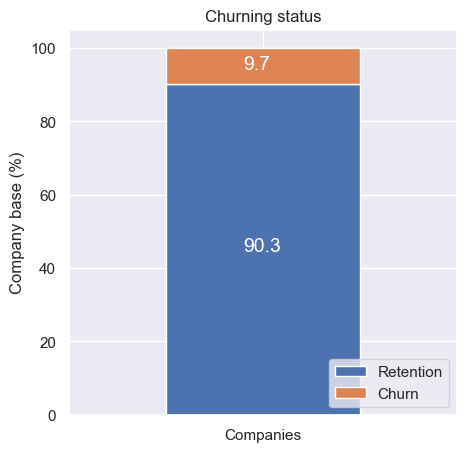

In [135]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

This shows that 9.7 percent of customers have churned.

---

<h2  style="color:#00308F"> Descriptive Statistics </h2>

### Numerical Statistics

Now let's look at some statistics about the numeric attributes in both datasets. We can do this by using the `describe()` method.

In [136]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that the column with the lowest variance is pric_off_peak_var. 

In [137]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


### Averages

Since the price data only covers 2015, we'll average all of those values for each client. Then, we'll merge average prices data with the client data, where ids match. 

In [138]:
# Make a copy of each dataframe
prices = price_df.copy()

# Drop the dates from price data
prices_avg = prices.drop(columns = 'price_date')

# Group by ids, take the average of each price column, and reset index
prices_avg = pd.DataFrame(price_df.groupby(['id'], observed = False)[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].mean()).sort_values(by = 'id')
prices_avg = prices_avg.reset_index()

# Merge the two together, keeping only matching ids
client_prices = pd.merge(clients, prices_avg, on = 'id', how = 'inner')

col_list = ['churn', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'forecast_price_pow_off_peak', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak']

prices_only = client_prices[col_list]

In [139]:
prices_only.describe()

,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,forecast_price_pow_off_peak,forecast_price_energy_off_peak,forecast_price_energy_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,0.097152,0.142327,0.052063,0.028276,42.928890,9.460874,6.097680,43.130056,0.137283,0.050491
std,0.296175,0.022512,0.049879,0.035802,4.550759,12.053587,7.770748,4.485988,0.024623,0.049037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.124430,0.000000,0.000000,40.688156,0.000000,0.000000,40.606701,0.116340,0.000000
50%,0.000000,0.147630,0.084509,0.000000,44.281745,0.000000,0.000000,44.311378,0.143166,0.084138
75%,0.000000,0.150415,0.102479,0.072833,44.370635,24.372163,16.248109,44.311378,0.146348,0.098837
max,1.000000,0.278098,0.196275,0.102951,59.286190,36.490689,16.818917,59.266378,0.273963,0.195975


<h4  style="color:#00308F"> Numerical Attributes </h4>

Numerical attributes are quantitative. You can measure the number or quantity, and each number is represented by either integer or ratio-scaled values. You can take the average, median and mode of these values.

#### Correlations

In order to calculate correlation for a dichotomous (binary) variable and numerical metrics, we'll use the point-biserial correlation coefficient. The dichotomous variable is churn, and the other metrics are the numerical columns. 

Let's start with the price columns.

In [140]:
from scipy.stats import pointbiserialr

# Create a function that takes a dataframe containing churn and outputs the pb_coeffs for all columns
def pb_corr(df):
    # Empty list for corr and p-values
    corr_ch = []
    
    # For each price value, point-biserial correlation coefficient correlation with churn
    for column in df:
        corr, p_val = pointbiserialr(df.churn, df[column])
        corr_ch.append([column, corr, round(p_val, 6)])
    
    # Add the data to a dataframe, sort by coefficient in descending order
    ch_corr_df = pd.DataFrame(corr_ch).rename(columns = {0: 'attribute', 1: 'PB_corr_coeff', 2: 'p_value'}).sort_values(by = 'PB_corr_coeff', ascending = False).reset_index(drop = True)
    return ch_corr_df

In [141]:
# Calculate the point-biserial correlation coefficient for price columns
pb_corr(prices_only)

,attribute,PB_corr_coeff,p_value
0,churn,1.000000,0.000000
1,price_peak_fix,0.047240,0.000000
2,price_mid_peak_var,0.046544,0.000000
3,price_mid_peak_fix,0.044842,0.000000
4,price_peak_var,0.029588,0.000348
5,forecast_price_energy_peak,0.029315,0.000395
6,price_off_peak_fix,0.016800,0.042326
7,forecast_price_pow_off_peak,0.014778,0.074108
8,price_off_peak_var,-0.006421,0.437762
9,forecast_price_energy_off_peak,-0.010837,0.190313


This tells us that the price attribute that has the highest correlation with churn is 'price_peak_fix' (which is each client's the average price of power for the 2nd period). This highest correlation coefficient was 0.047. This means that price itself has a very low correlation with churn. However, the higher p-values of the last three rows tells us that those low correlations may be due to chance.

Let's take a look at the point-biserial correlation coefficient for the other numerical attributes.

In [142]:
# List of other numeric attributes
cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 
        'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']

# Create nums dataframe for numeric attributes, starting with our target, G3
nums = client_prices[cols]

# Calcualte the point-biserial correlation for 
pb_corr(nums)

,attribute,PB_corr_coeff,p_value
0,churn,1.000000,0.000000
1,margin_net_pow_ele,0.095772,0.000000
2,margin_gross_pow_ele,0.095725,0.000000
3,forecast_meter_rent_12m,0.044245,0.000000
4,net_margin,0.041135,0.000001
5,pow_max,0.030362,0.000243
6,forecast_discount_energy,0.017026,0.039623
7,forecast_cons_12m,0.012949,0.117602
8,imp_cons,-0.001583,0.848268
9,forecast_cons_year,-0.002558,0.757269


This tells us that

Now, let's take a look to see how correlated the numerical columns are to each other.

In [143]:
# List of other numeric attributes
cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
    'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn',
    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

# Create nums dataframe for numeric attributes, starting with our target, G3
nums = client_prices[cols]

nums_corr = abs(nums.corr(method = 'spearman'))

sort_corr = pd.DataFrame(nums_corr['price_off_peak_fix']).sort_values(by = 'price_off_peak_fix', ascending = False)
sort_corr

,price_off_peak_fix
price_off_peak_fix,1.000000
forecast_price_pow_off_peak,0.834701
price_mid_peak_var,0.757733
price_mid_peak_fix,0.727502
price_off_peak_var,0.684942
price_peak_var,0.681211
forecast_price_energy_peak,0.677335
forecast_price_energy_off_peak,0.673868
price_peak_fix,0.672000
pow_max,0.657872


Let's look at all the price correlations.

In [144]:
# Eliminate the churn attribute from the prices_only dataframe
prices_no_ch = prices_only.drop(columns = 'churn')

# Showing the correlations that all the price attributes have with each other
prices_corr = abs(prices_no_ch.corr())
prices_corr

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,forecast_price_pow_off_peak,forecast_price_energy_off_peak,forecast_price_energy_peak
price_off_peak_var,1.000000,0.317882,0.609086,0.662064,0.631643,0.609196,0.636799,0.951222,0.299122
price_peak_var,0.317882,1.000000,0.822436,0.211414,0.810653,0.815675,0.249559,0.355831,0.994046
price_mid_peak_var,0.609086,0.822436,1.000000,0.288083,0.987691,0.991544,0.325664,0.643987,0.803913
price_off_peak_fix,0.662064,0.211414,0.288083,1.000000,0.228613,0.332563,0.934633,0.575805,0.207921
price_peak_fix,0.631643,0.810653,0.987691,0.228613,1.000000,0.974096,0.265509,0.665798,0.791487
price_mid_peak_fix,0.609196,0.815675,0.991544,0.332563,0.974096,1.000000,0.371031,0.645149,0.796767
forecast_price_pow_off_peak,0.636799,0.249559,0.325664,0.934633,0.265509,0.371031,1.000000,0.630377,0.242017
forecast_price_energy_off_peak,0.951222,0.355831,0.643987,0.575805,0.665798,0.645149,0.630377,1.000000,0.330138
forecast_price_energy_peak,0.299122,0.994046,0.803913,0.207921,0.791487,0.796767,0.242017,0.330138,1.000000


That's quite complicated. Lets look at one peak column and one off_peak column.

In [145]:
# Focus on just price_mid_peak_var
sort_corr_peak = pd.DataFrame(prices_corr['price_mid_peak_var']).sort_values(by = 'price_mid_peak_var', ascending = False)
sort_corr_peak

,price_mid_peak_var
price_mid_peak_var,1.000000
price_mid_peak_fix,0.991544
price_peak_fix,0.987691
price_peak_var,0.822436
forecast_price_energy_peak,0.803913
forecast_price_energy_off_peak,0.643987
price_off_peak_var,0.609086
forecast_price_pow_off_peak,0.325664
price_off_peak_fix,0.288083


In [146]:
# Focus on just price_off_peak_fix
sort_corr_off = pd.DataFrame(prices_corr['price_off_peak_fix']).sort_values(by = 'price_off_peak_fix', ascending = False)
sort_corr_off

,price_off_peak_fix
price_off_peak_fix,1.000000
forecast_price_pow_off_peak,0.934633
price_off_peak_var,0.662064
forecast_price_energy_off_peak,0.575805
price_mid_peak_fix,0.332563
price_mid_peak_var,0.288083
price_peak_fix,0.228613
price_peak_var,0.211414
forecast_price_energy_peak,0.207921


We find that the price_peak variables are highly correlated to each other, and that the price_off_peak variables are also closely correlated. This is important because we wouldn't want to include highly correlated columns together in a logistic regression.

### Churn Proportions in Price Quartiles

In order to better understand what influence price is having on churn, we need to understand the distribution of each price column. It would also help to see if the clients who had higher prices compared to others actually churned more often. To find this out, we'll calculate the pertentages of clients who churned in each quartile. For example, for clients who had the lowest 25% of prices, what was the churn rate? But technically, they won't always be exact quartiles, since the price attributes have differing distributions.

After defining our function for proportions, we'll show the following for each price variable:
- Graph the column's distribution
- Calculate the quartile proportions by churn
- Graph the proportions by churn value

In [147]:
# Create function to calculate churn rate for quartiles of the specified price column
def calc_proportions(column, Q1, Q2, Q3):
    
    # Calculate quartiles for the column for making cut
    my_groups = client_prices[column].quantile([0.00, Q1, Q2, Q3, 1.00])

    # labels for the groups
    labels = ['Very Low','Low','Moderate','High']

    # bins for the cuts
    bins = [-1, my_groups[Q1], my_groups[Q2], my_groups[Q3], my_groups[1.00]]

    cut = 'cut_' + column

    # Assign the labels to a new column in client_prices, our copy of the training features
    client_prices[cut] = pd.cut(client_prices[column], bins=bins, labels=labels)

    # Dataframe for churn values
    pr_churn = pd.DataFrame(client_prices.churn_char.unique()).sort_values(by = 0).reset_index(drop = True)

    pr_churn = pr_churn.rename(columns = {0: "churn"})

    # How many from each price_cut group is in each churn category
    churn_mult = pd.DataFrame(client_prices.groupby([cut, 'churn'], observed = False)['churn'].count())

    # Assign the grouped values to pr_churn dataframe
    pr_churn[labels[0]] = [churn_mult.xs(labels[0]).loc[0].values.max(), churn_mult.xs(labels[0]).loc[1].values.max()]
    pr_churn[labels[1]] = [churn_mult.xs(labels[1]).loc[0].values.max(), churn_mult.xs(labels[1]).loc[1].values.max()]
    pr_churn[labels[2]] = [churn_mult.xs(labels[2]).loc[0].values.max(), churn_mult.xs(labels[2]).loc[1].values.max()]
    pr_churn[labels[3]] = [churn_mult.xs(labels[3]).loc[0].values.max(), churn_mult.xs(labels[3]).loc[1].values.max()]
    
    # Total for each price_cut, so that percentages can be calculated
    total = pr_churn[labels[0]] + pr_churn[labels[1]] + pr_churn[labels[2]] + pr_churn[labels[3]]

    # Calculate percentages for each 
    ch_prop = pr_churn[pr_churn.columns[1:]].div(total, 0)*100

    # Add the churn column
    ch_prop['churn'] = pr_churn['churn']

    # Re-order the columns
    ch_prop = ch_prop[['churn', 'Very Low', 'Low', 'Moderate', 'High']]
    
    return ch_prop

First, let's look at the prices during the 1st period.

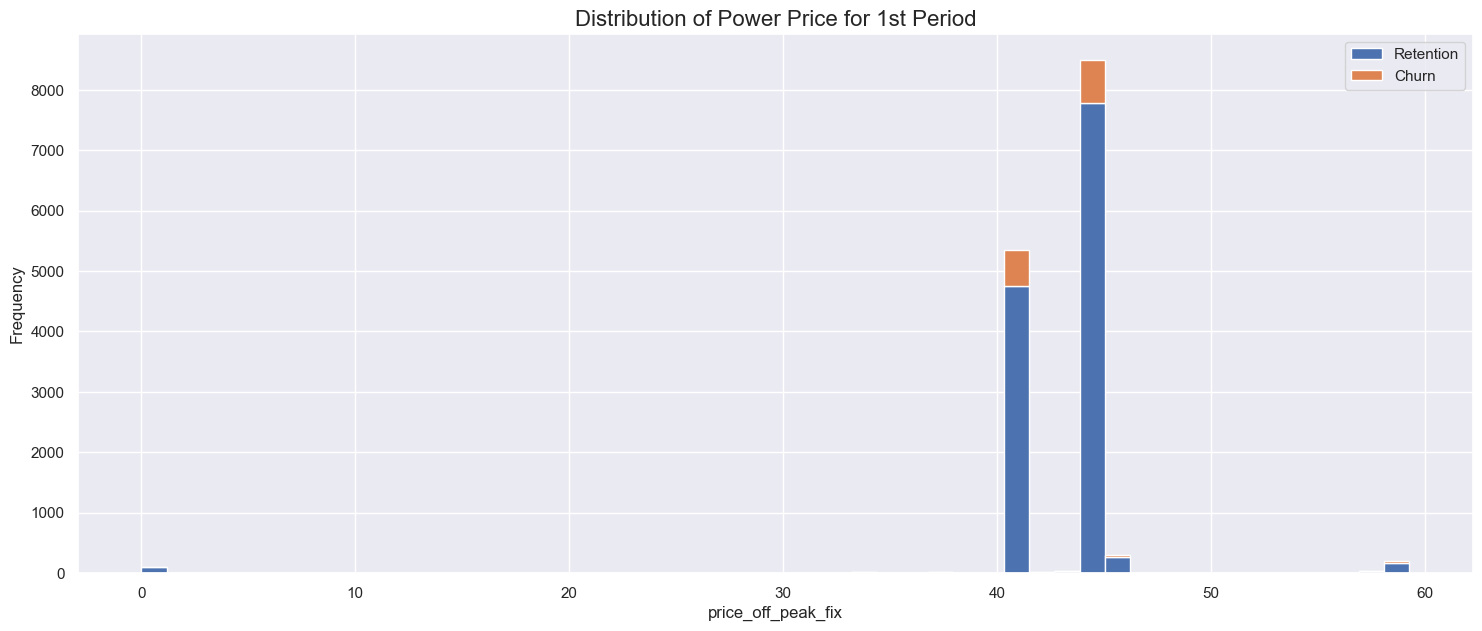

In [148]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Power Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'price_off_peak_fix', axs)

In [149]:
# Calculate the proportions in each quartile for the power price during the 1st period.
power_1st = calc_proportions('price_off_peak_fix', 0.25, 0.50, 0.75).sort_values(by = 'churn', ascending = False)
power_1st

,churn,Very Low,Low,Moderate,High
1,yes,28.470754,25.933756,20.366455,25.229035
0,no,26.002882,23.788580,25.828467,24.380071


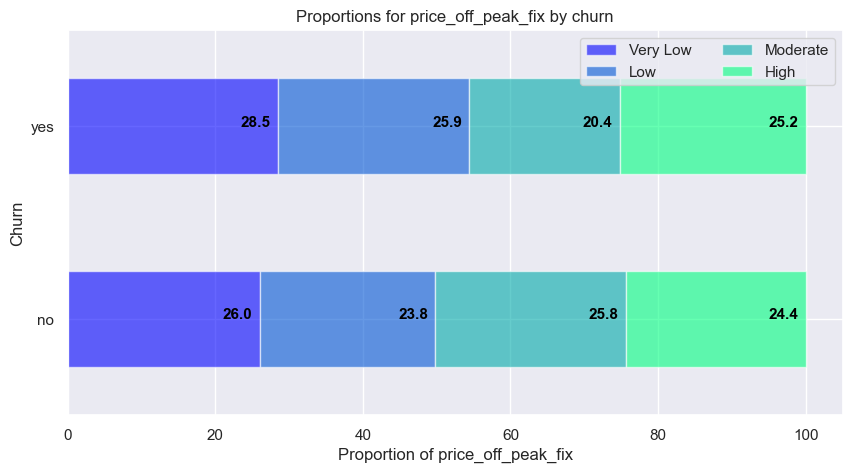

In [150]:
# Graph Proportions
plot_proportions('price_off_peak_fix', -5, 0.25, 0.50, 0.75)

Now, for energy during the first period.

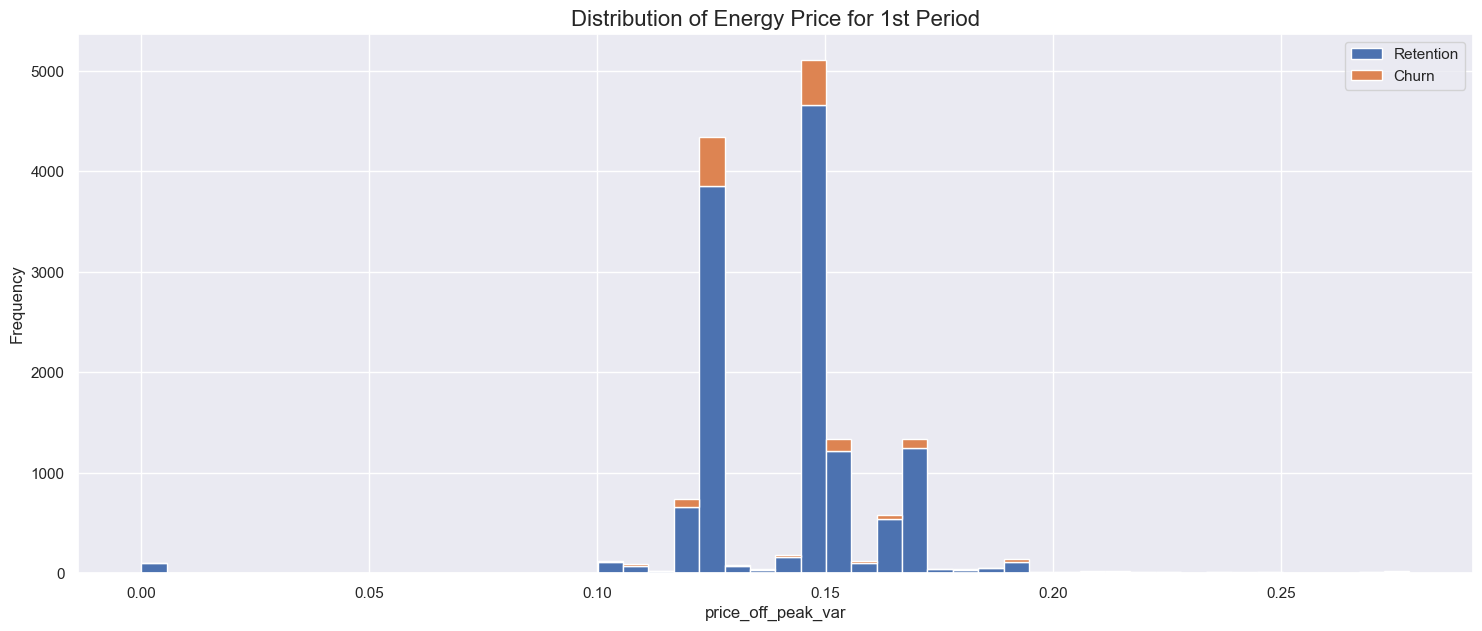

In [151]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Energy Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'price_off_peak_var', axs)

In [152]:
# Calculate the proportions in each quartile for the energy price during the 1st period
energ_1st = calc_proportions('price_off_peak_var', 0.25, 0.50, 0.75).sort_values(by = 'churn', ascending = False)
energ_1st

,churn,Very Low,Low,Moderate,High
1,yes,27.202255,28.118393,22.198732,22.480620
0,no,24.797149,24.645484,25.312808,25.244559


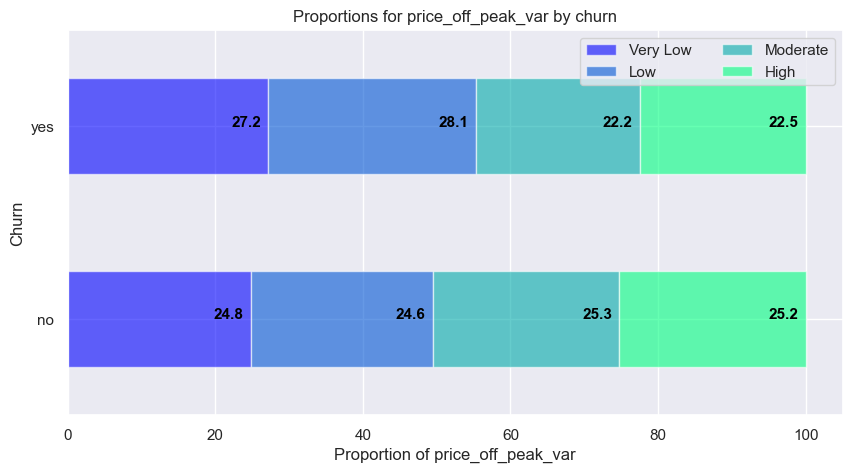

In [153]:
# Graph Proportions
plot_proportions('price_off_peak_var', -5, 0.25, 0.50, 0.75)

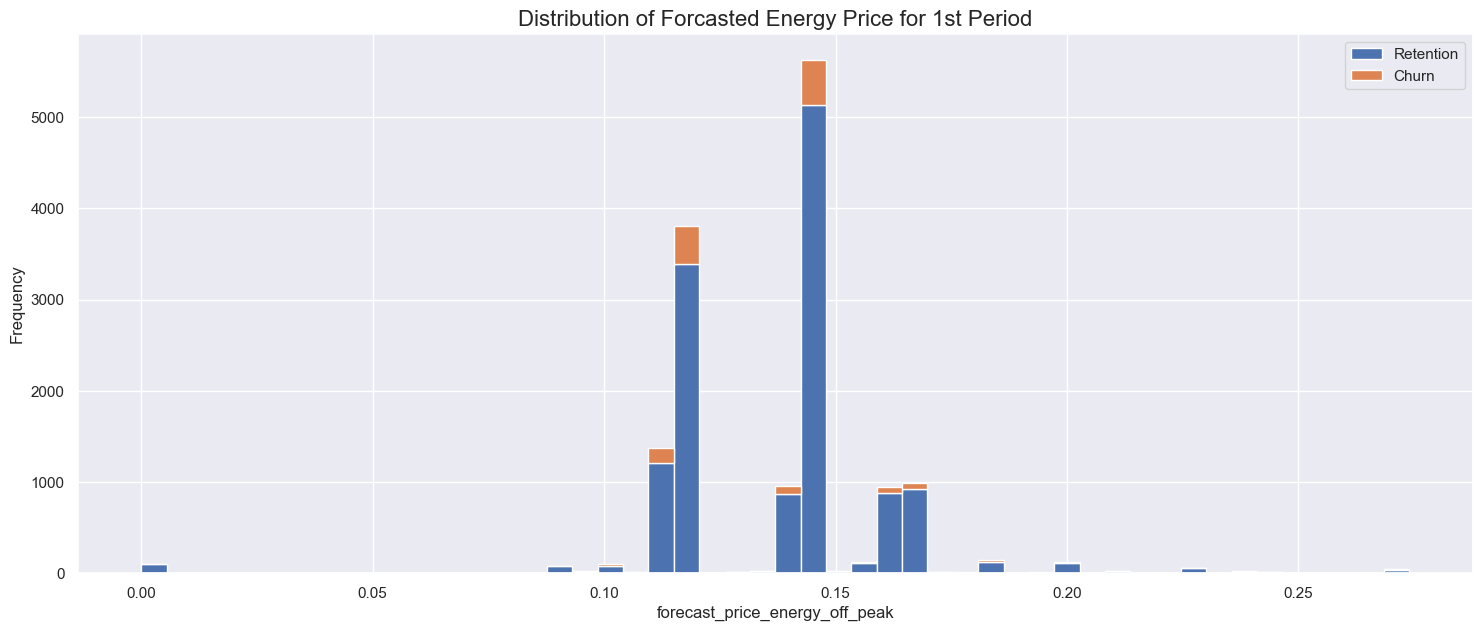

In [154]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Energy Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'forecast_price_energy_off_peak', axs)

In [155]:
# Calculate the proportions for forcasted energy price for the 1st period.
calc_proportions('forecast_price_energy_off_peak', 0.25, 0.50, 0.75).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,28.964059,26.356589,22.551092,22.128259
0,no,25.054978,24.554485,26.169713,24.220824


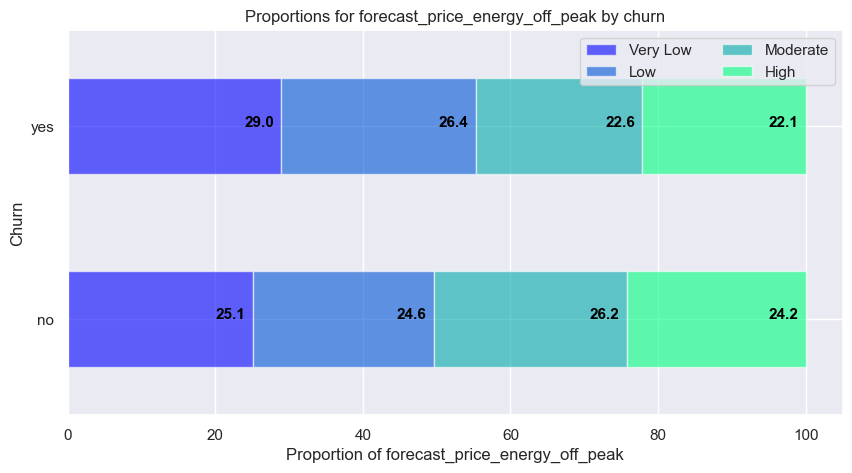

In [156]:
# Graph Proportions
plot_proportions('forecast_price_energy_off_peak', -5, 0.25, 0.50, 0.75)

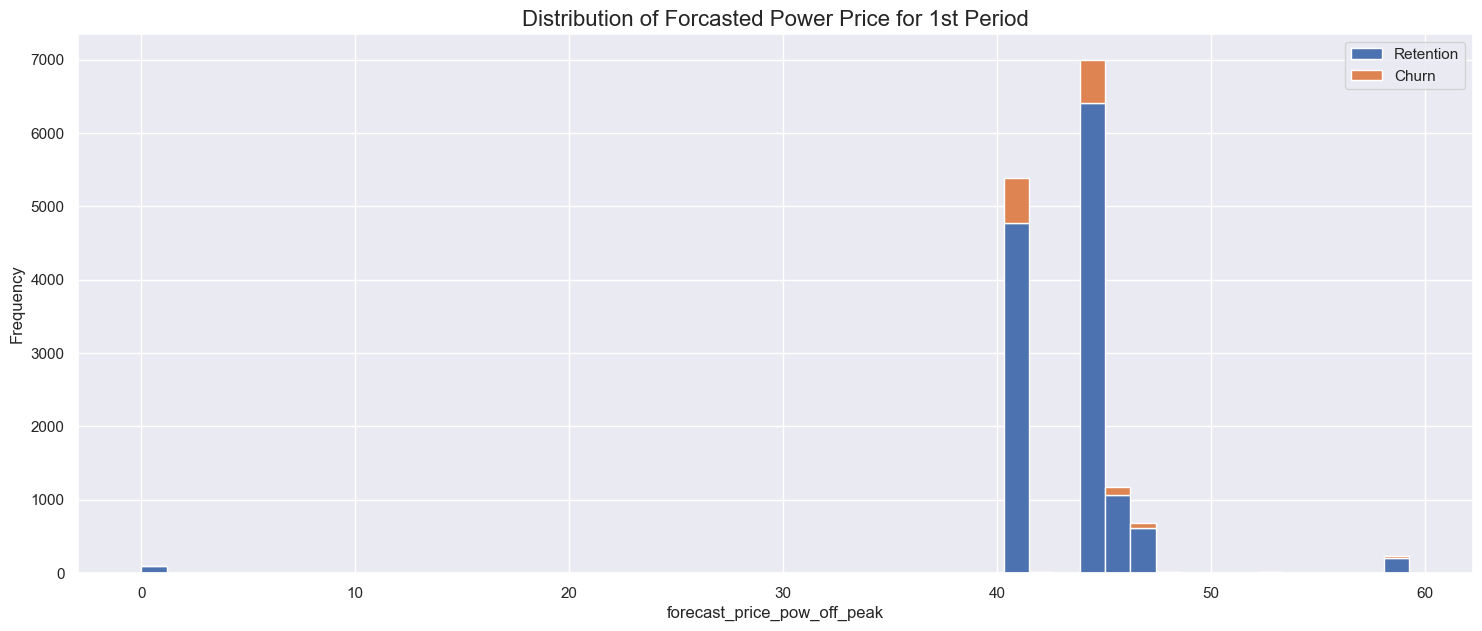

In [157]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Power Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'forecast_price_pow_off_peak', axs)

In [158]:
# Calculate the proportions for forcasted Power price for the 1st period.
calc_proportions('forecast_price_pow_off_peak', 0.25, 0.37, 0.88).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,36.856942,6.342495,43.904158,12.896406
0,no,32.039129,4.860848,51.656935,11.443088


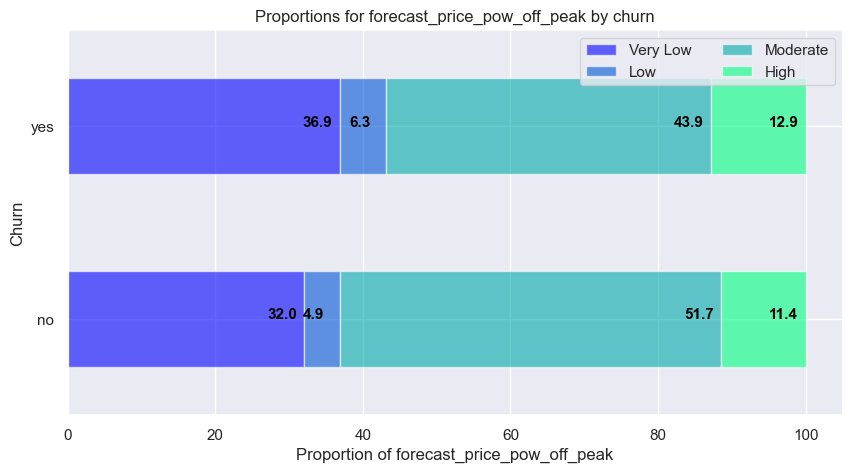

In [159]:
# Graph Proportions
plot_proportions('forecast_price_pow_off_peak', -5, 0.25, 0.37, 0.88)

These proportions show no consistent trend, though the power price had a slightly higher percentage of clients who churned in the "high" catergory. price during the first period didn't enfluence on churn very much. There actually seems to be a greater number of clients with a low price during the first period who left.

Let's take a look at the 2nd period.

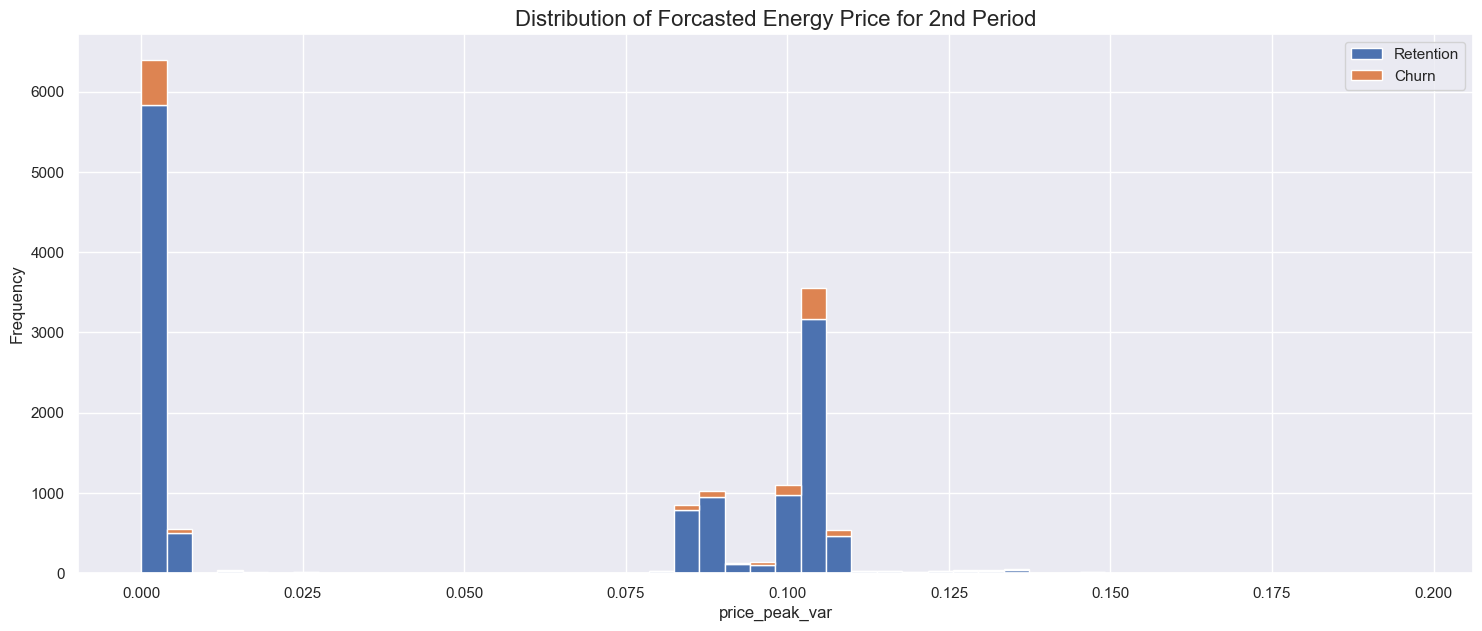

In [160]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Energy Price for 2nd Period", fontsize = 16)

plot_distribution(prices_only, 'price_peak_var', axs)

In [161]:
# Calculate the proportions for energy price for the 2nd period.
calc_proportions('price_peak_var', 0.25, 0.50, 0.75).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,40.098661,6.412967,23.255814,30.232558
0,no,44.187457,6.203079,25.214226,24.395238


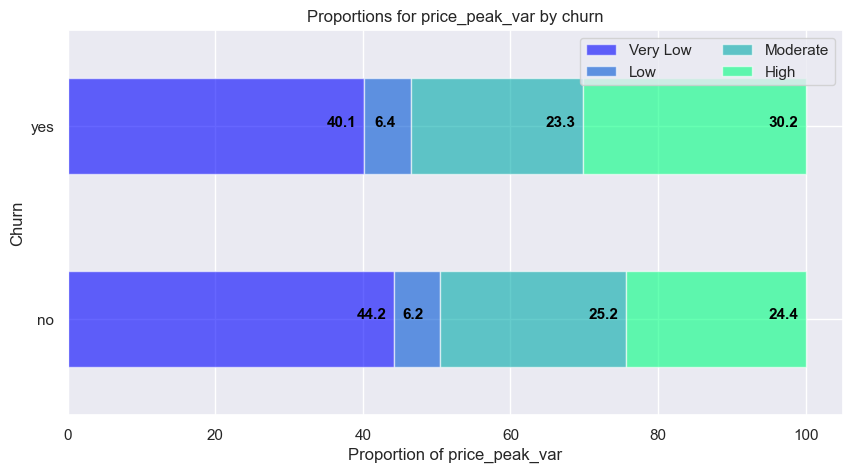

In [162]:
# Graph Proportions
plot_proportions('price_peak_var', -5, 0.25, 0.50, 0.75)

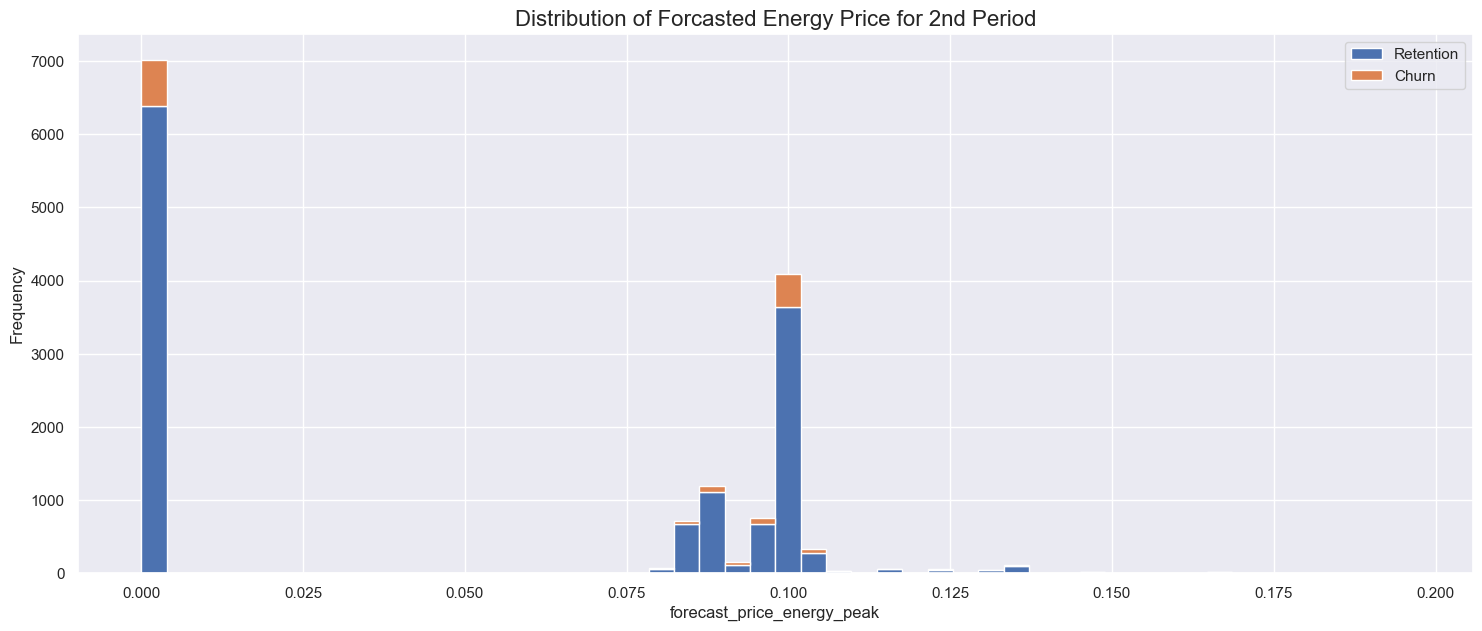

In [163]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Energy Price for 2nd Period", fontsize = 16)

plot_distribution(prices_only, 'forecast_price_energy_peak', axs)

In [164]:
# Calculate the proportions for forcasted energy price for the 2nd period.
calc_proportions('forecast_price_energy_peak', 0.38, 0.60, 0.75).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,44.397463,8.949965,16.983791,29.668781
0,no,48.464397,12.542656,14.855540,24.137408


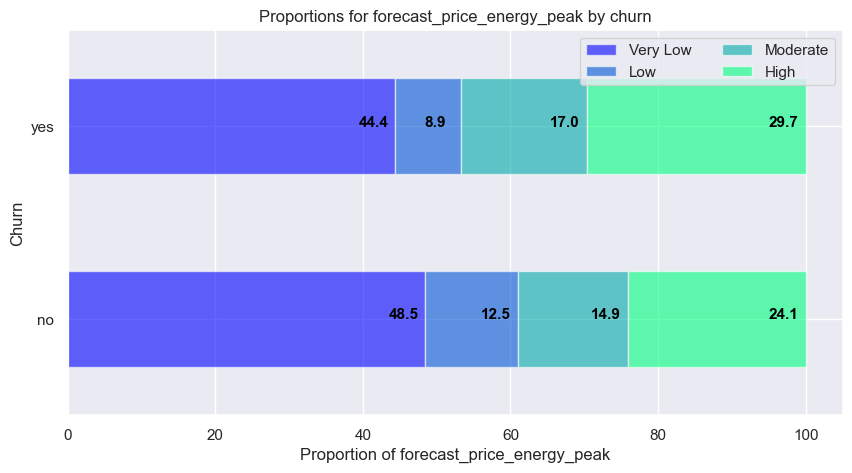

In [165]:
# Graph Proportions
plot_proportions('forecast_price_energy_peak', -5, 0.38, 0.60, 0.75)

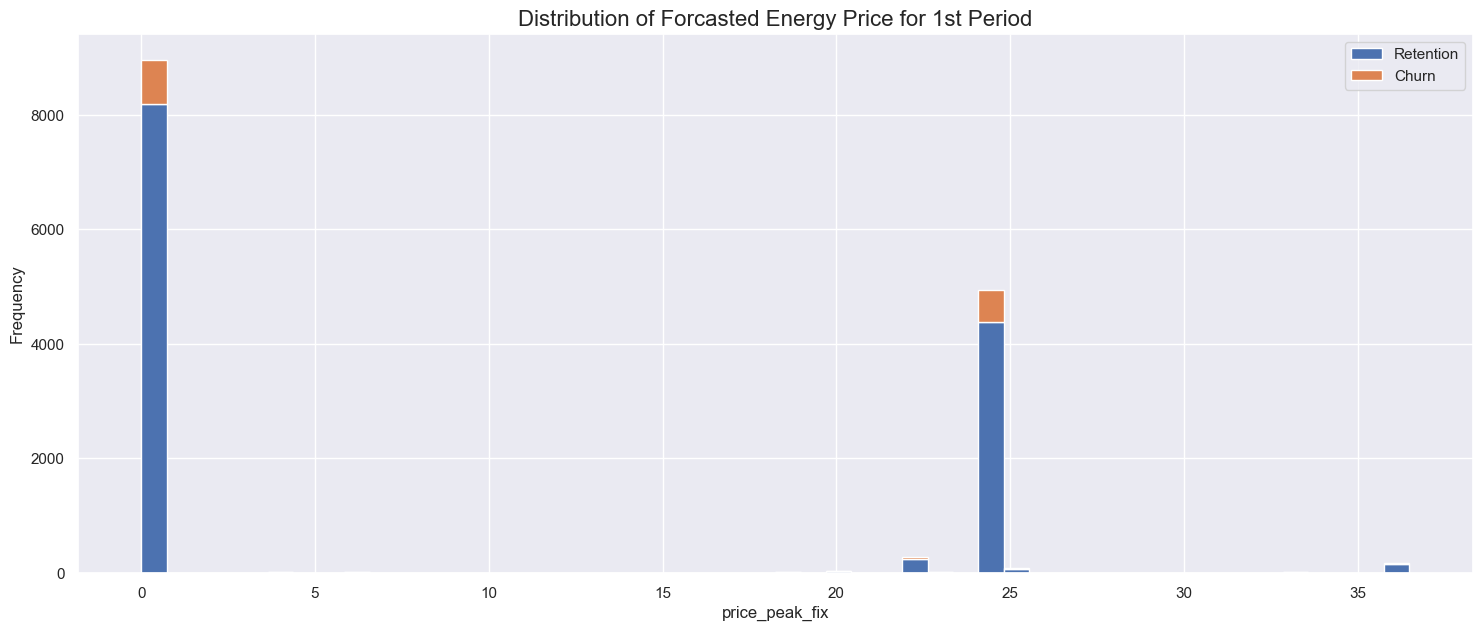

In [166]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Price of Power for 2nd Period", fontsize = 16)

plot_distribution(prices_only, 'price_peak_fix', axs)

In [167]:
# Calculate the proportions for power price for the 2nd period.
calc_proportions('price_peak_fix', 0.25, 0.68, 0.88).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,54.545455,8.949965,22.621564,13.883016
0,no,62.076287,6.491241,21.035869,10.396603


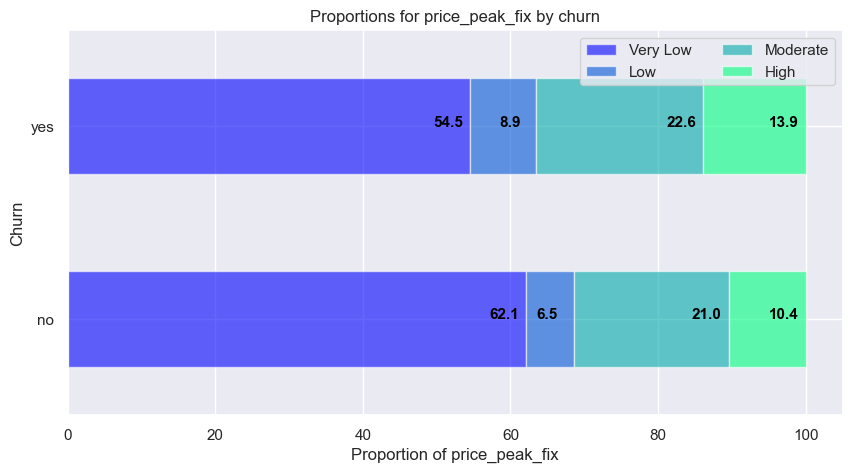

In [168]:
# Graph Proportions
plot_proportions('price_peak_fix', -5, 0.25, 0.68, 0.88)

Take a look at the "High" category in the last 3 data frames. The percentage is higher for those who churned in every instance and the opposite is true of the "Very Low" category. This shows an increase of influence on churn when compared to the first period.

Let's take a look at the 3rd period.

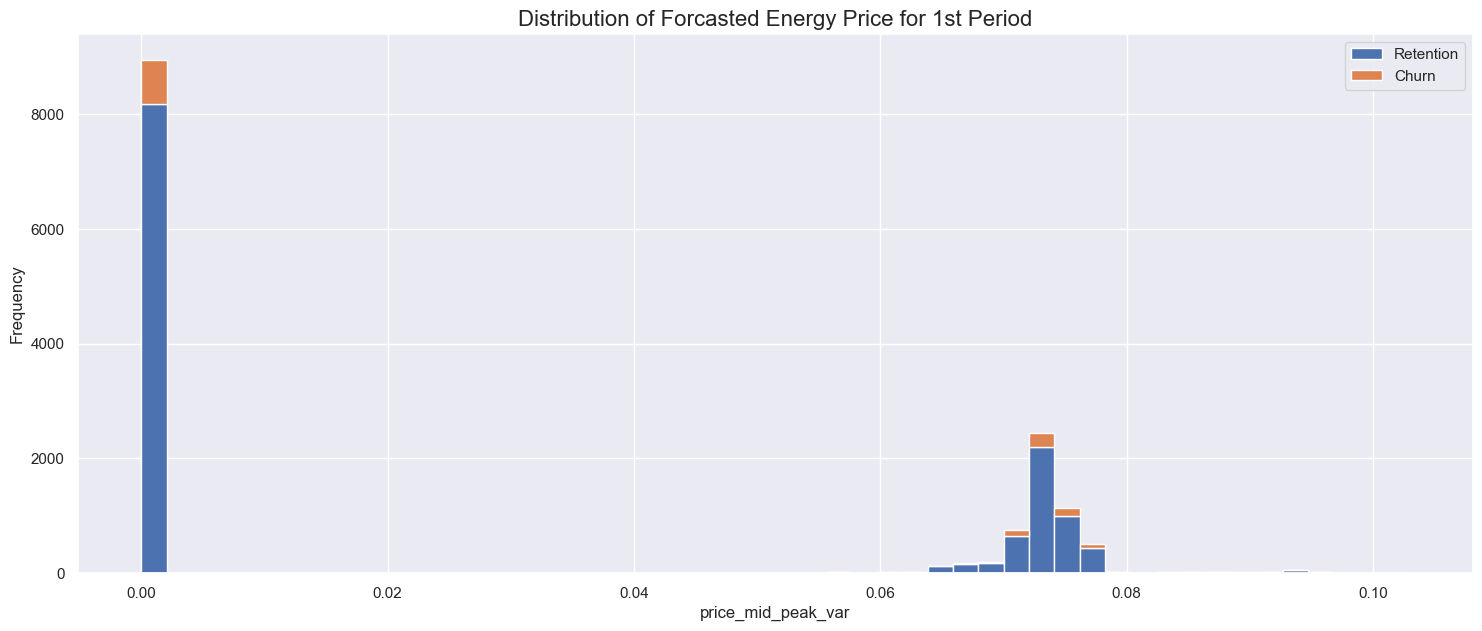

In [169]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Energy Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'price_mid_peak_var', axs)

In [170]:
# Calculate the proportions for energy price for the 3rd period.
calc_proportions('price_mid_peak_var', 0.25, 0.75, 0.88).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,54.545455,16.138125,13.319239,15.997181
0,no,61.977705,13.482976,12.967316,11.572003


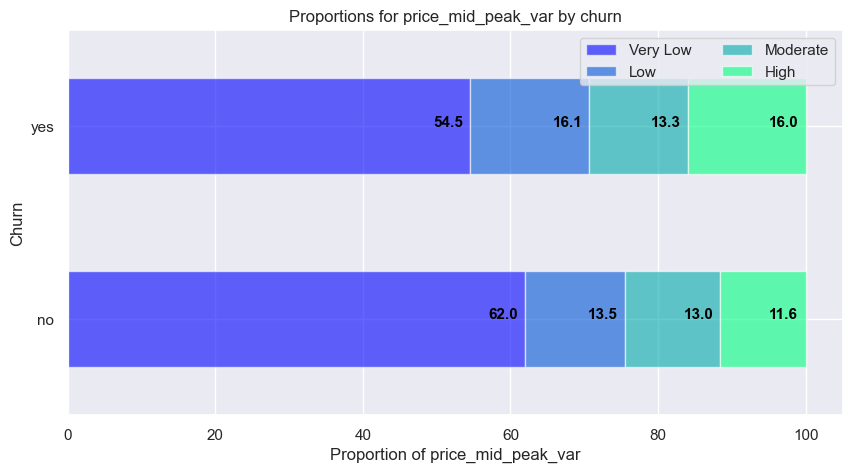

In [171]:
# Graph Proportions
plot_proportions('price_mid_peak_var', -5, 0.25, 0.75, 0.88)

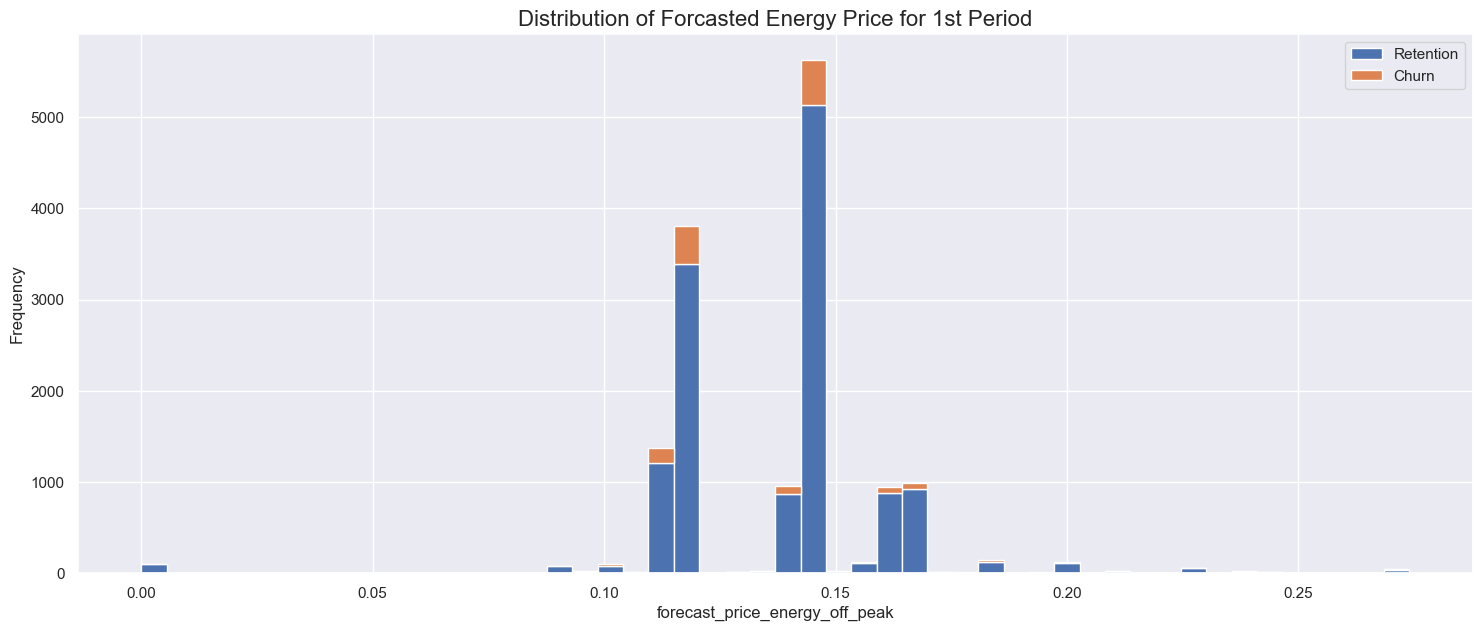

In [172]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 7))

plt.title("Distribution of Forcasted Energy Price for 1st Period", fontsize = 16)

plot_distribution(prices_only, 'forecast_price_energy_off_peak', axs)

In [173]:
# Calculate the proportions for POWER price for the 3rd period.
calc_proportions('price_mid_peak_fix', 0.25, 0.75, 0.88).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,54.545455,18.604651,14.376321,12.473573
0,no,62.076287,14.514294,13.596724,9.812694


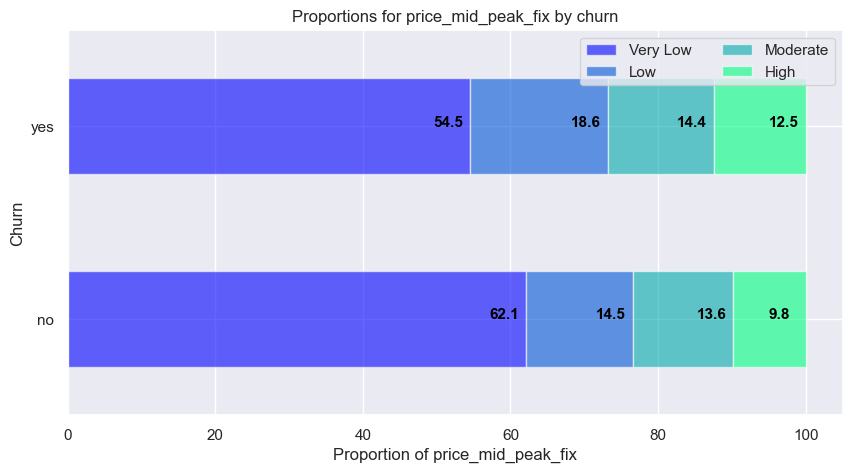

In [174]:
# Graph Proportions
plot_proportions('price_mid_peak_fix', -5, 0.25, 0.75, 0.88)

The 3rd period seems to follow the same trend as the 2nd period. 

Let's check to see if there are other numeric colunms we can check with these proportions.

In [175]:
calc_proportions('net_margin', 0.25, 0.50, 0.75).sort_values(by = 'churn', ascending = False)

,churn,Very Low,Low,Moderate,High
1,yes,24.101480,23.537703,24.312896,28.047921
0,no,25.100478,25.153560,25.070145,24.675817


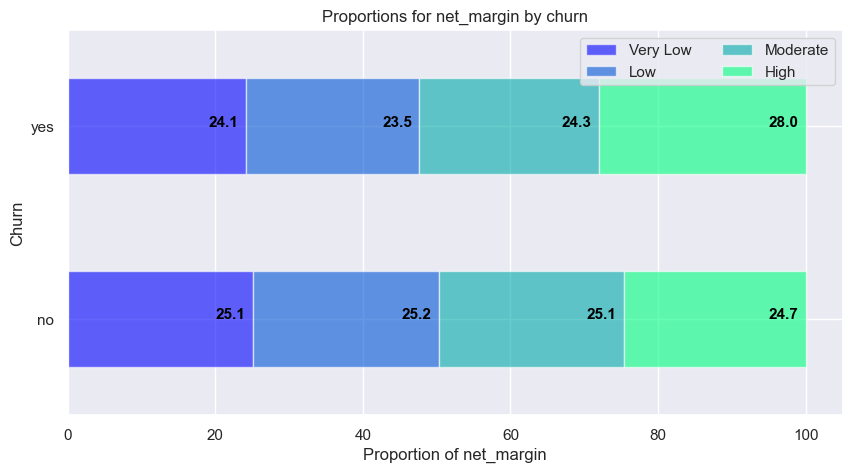

In [176]:
# Graph Proportions
plot_proportions('net_margin', -5, 0.25, 0.50, 0.75)

We see a similar trend with the 3rd period as the 2nd period.

### Difference in Price

What if we could see which clients moved price category from one period to another, and whether that influenced churn. For example, if client A went from "Very Low" in the first period to "Low" or "Moderate", that would be considered being moved to a higher price catergory. 

Remember, the price categories are based on percentiles of prices in that period. In other words, the category is a client's price in relation to what prices other clients have. So, if we say the client's price category went up, it doensn't necessarily mean their price went up. It could just mean that the prices of other clients went down more than theirs did.

Do store the difference in price category from period to period, we'll create a new column, which tells whether the client's price category moved higher, lower, or stayed the same between two specified price periods. Then we'll look at the proportions for churn again for that shift column.

In [177]:
# Create function that creates a new column that holds the change/shift values. Then use that column to calculate porportions for churn.
def calc_diff_proportions(col_after, col_before):

    # string variables for column names
    shift = 'shift_' + col_after
    col_after = 'cut_' + col_after
    col_before = 'cut_' + col_before
    
    # Create new column (shift) for holding the shift values
    client_prices.loc[((client_prices[col_after] > client_prices[col_before])), shift] = 'higher' # type: ignore
    client_prices.loc[((client_prices[col_after] < client_prices[col_before])), shift] = 'lower'
    client_prices.loc[((client_prices[col_after] == client_prices[col_before])), shift] = 'same'

    # Multi-dimensional dataframe with counts grouped by shift and churn
    diff_mult = pd.DataFrame(client_prices.groupby([shift, 'churn'], observed = False)['churn'].count())

    # Dataframe for churn values rearranged
    pr_churn = pd.DataFrame(client_prices.churn_char.unique()).sort_values(by = 0).reset_index(drop = True)

    pr_churn = pr_churn.rename(columns = {0: "churn"})

    # Assign the grouped values to pr_churn dataframe
    pr_churn['higher'] = [diff_mult.xs('higher').loc[0].values.max(), diff_mult.xs('higher').loc[1].values.max()]
    pr_churn['lower'] = [diff_mult.xs('lower').loc[0].values.max(), diff_mult.xs('lower').loc[1].values.max()]
    pr_churn['same'] = [diff_mult.xs('same').loc[0].values.max(), diff_mult.xs('same').loc[1].values.max()]

    # Total for each price_cut, so that percentages can be calculated
    total = pr_churn['higher'] + pr_churn['lower'] + pr_churn['same']

    # Calculate percentages for each 
    ch_prop = pr_churn[pr_churn.columns[1:]].div(total, 0)*100

    # Add the churn column
    ch_prop['churn'] = pr_churn['churn']

    # Re-order the columns
    ch_prop = ch_prop[['churn', 'higher', 'lower', 'same']]
    
    return ch_prop

Let's calculate the change in price of power from 1st to 2nd period.

In [178]:
# Calculate change in power price category from the 1st to 2nd period.
calc_diff_proportions('price_peak_fix', 'price_off_peak_fix').sort_values(by = 'churn', ascending = False)

,churn,higher,lower,same
1,yes,40.310078,54.545455,5.144468
0,no,34.071434,61.280049,4.648517


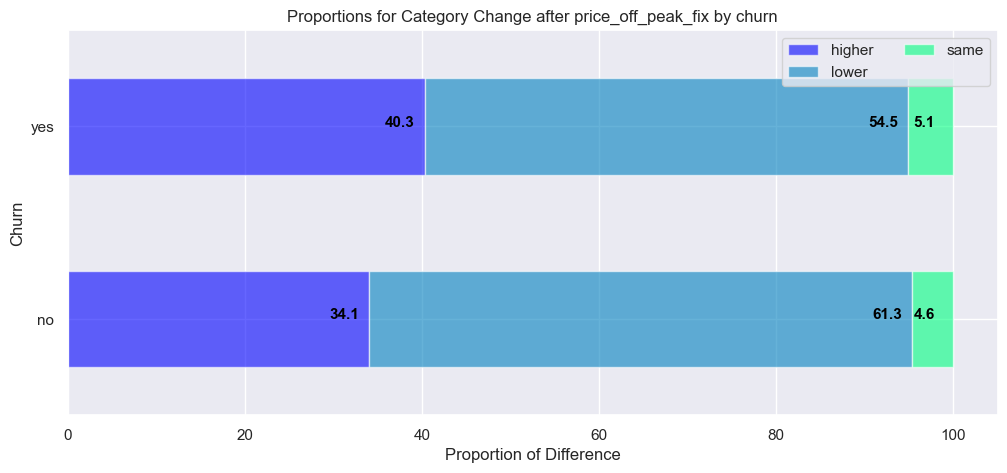

In [179]:
# Graph it
plot_diff_proportions('price_peak_fix', 'price_off_peak_fix', -4.5, 11)

The proportions of clients who changed price category over time tells us that change in price of power certainly effects churn. Clients who churned had over 6.23 percent more significant price increases than those those who did not churn. Those who churned had over 6.7 percent less price decreases. Those who stayed in the same price category still had almost 0.5 percent more clients who churned. So, while it's not a huge difference, six percent is a fair amount of influence, so price sensitivity does have a fair amount of influence on customer churning

Let's try the same for energy.

In [180]:
# Calculate the change in energy price category for clients from the 1st to 2nd period.
calc_diff_proportions('price_peak_var', 'price_off_peak_var').sort_values(by = 'churn', ascending = False)

,churn,higher,lower,same
1,yes,43.904158,52.572234,3.523608
0,no,36.619398,59.869569,3.511034


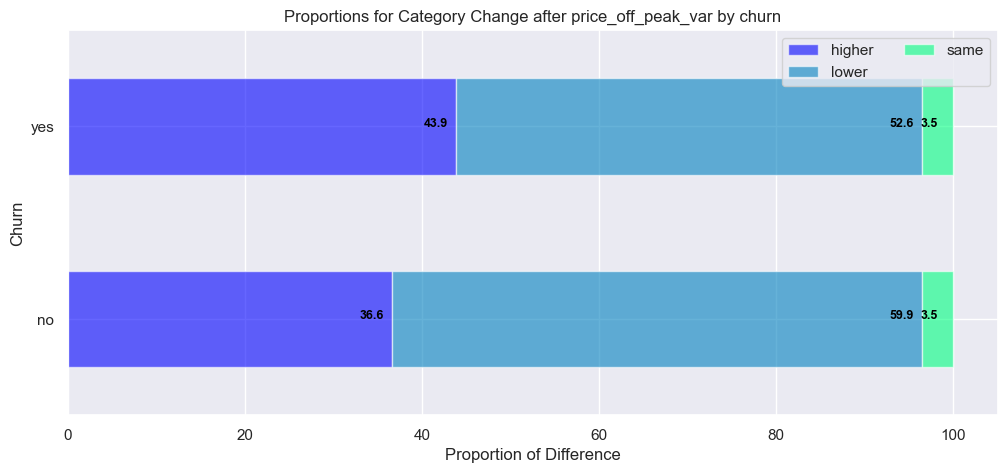

In [181]:
# Graph it
plot_diff_proportions('price_peak_var', 'price_off_peak_var', -3.7, 9)

We see a similar trend for energy prices, but the percent change is slightly larger. Clients who churned had over 7.5 percent more significant price increases compared to clients who did not churn. Clients who churned had over 7.2 percent less price decreases.

Let's check out the category changes for forecasted energy price from the 1st to 2nd period.

In [182]:
# Calculate change in forecasted energy price from the 1st to the 2nd period.
calc_diff_proportions('forecast_price_energy_peak', 'forecast_price_energy_off_peak').sort_values(by = 'churn', ascending = False)

,churn,higher,lower,same
1,yes,43.410853,54.122622,2.466526
0,no,36.407068,61.007052,2.585880


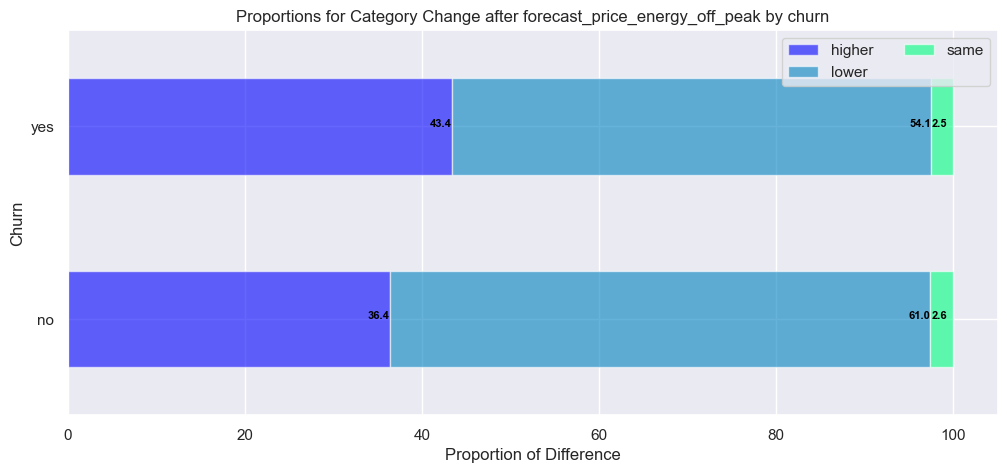

In [183]:
# Graph it
plot_diff_proportions('forecast_price_energy_peak', 'forecast_price_energy_off_peak', -2.5, 8)

We see the similar trend as before, that those who churned had 7 percent more who moved up in average price category.

Let's take a stab at the change in power price from the 2nd to 3rd period.

In [184]:
# Calculate change in power price category from the 2nd to 3rd period.
calc_diff_proportions('price_mid_peak_fix', 'price_peak_fix').sort_values(by = 'churn', ascending = False)

,churn,higher,lower,same
1,yes,0.563777,9.654686,89.781536
0,no,0.690074,8.023053,91.286873


Let's check out the price category hikes going from the 2nd to the 3rd period.

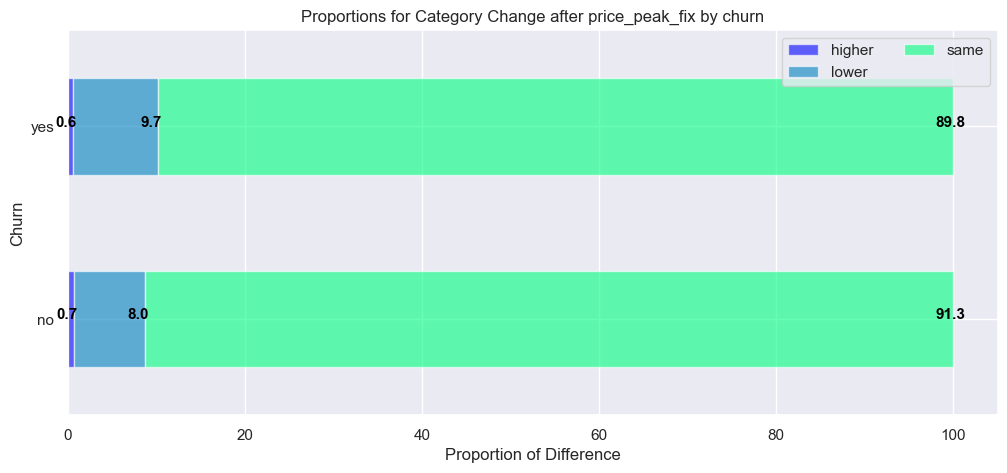

In [185]:
# Graph it
plot_diff_proportions('price_mid_peak_fix', 'price_peak_fix', -2, 11)

Here, we don't see much of a change. Only 0.6 percent of those who churned had a price category that bumped up. Those who didn't churn had a slightly higher percentage of 0.7.  

## Conclusions

In all of this, we can see from correlations that the price is not highly correlated with churn. The biggest insight we found was the when a client's average price category changed to a higher category, then the client was at least 6 percent more likely to churn. 